In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
combo_df = pd.read_csv('combo_df.csv')
stock_list = pd.read_csv('list_of_stocks.csv')

# clean up the main combo_df index
combo_df = combo_df.rename(columns={'Unnamed: 0':'Date'})
combo_df = combo_df.set_index('Date')

# clean up stock_list index (each row has a unique ticker)
stock_list = stock_list.set_index('Ticker')

# pull 'sector' into the combo_df
combo_df['Sector'] = [stock_list.loc[ticker]['Sector'] for ticker in combo_df['Ticker']]

In [5]:
combo_df = pd.get_dummies(combo_df, columns=['Ticker'])
combo_df.head()

,Revenue,Gross Profit,Operating Income,Income Tax Provision,Net Income Common,Total Assets,Total current assets,Total liabilities,Total current liabilities,Shareholders Equity (Total),...,Ticker_ZIXI,Ticker_ZM,Ticker_ZNGA,Ticker_ZS,Ticker_ZTS,Ticker_ZUMZ,Ticker_ZUO,Ticker_ZVO,Ticker_ZYNE,Ticker_ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,3.252080e+11,1.266010e+11,8.890300e+10,1.331700e+10,7.631100e+10,3.371580e+11,1.214650e+11,2.679800e+11,1.063850e+11,6.917800e+10,...,0,0,0,0,0,0,0,0,0,0
2020-12-31,2.939710e+11,1.137350e+11,7.425300e+10,1.082200e+10,6.393000e+10,3.540540e+11,1.541060e+11,2.878300e+11,1.325070e+11,6.622400e+10,...,0,0,0,0,0,0,0,0,0,0
2020-09-30,2.742470e+11,1.042750e+11,6.628800e+10,9.680000e+09,5.741100e+10,3.238880e+11,1.437130e+11,2.585490e+11,1.053920e+11,6.533900e+10,...,0,0,0,0,0,0,0,0,0,0
2020-06-30,2.736210e+11,1.039940e+11,6.713800e+10,9.893000e+09,5.842400e+10,3.173440e+11,1.400650e+11,2.450620e+11,9.531800e+10,7.228200e+10,...,0,0,0,0,0,0,0,0,0,0
2020-03-31,2.680150e+11,1.021730e+11,6.559100e+10,9.876000e+09,5.721500e+10,3.204000e+11,1.437530e+11,2.419750e+11,9.609400e+10,7.842500e+10,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = combo_df.drop(columns=['Sector'])
y = combo_df['Sector']

In [8]:
# KMeans Model

In [18]:
start_time = time.time()

#scale the data
sc = StandardScaler()
X_train_k = sc.fit_transform(X)

#instantiate the KMeans model
km = KMeans(n_clusters=11)
km.fit(X_train_k)

# set the cluster labels
X['cluster'] = km.labels_

print(f"This code took {round(time.time() - start_time)} seconds to run")

This code took 235 seconds to run


In [19]:
start_time = time.time()

km.cluster_centers_

print(f"This code took {round(time.time() - start_time)} seconds to run")

This code took 0 seconds to run


In [21]:
start_time = time.time()

centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns = [X.columns[:-1]]
)

print(f"This code took {round(time.time() - start_time)} seconds to run")

This code took 0 seconds to run


<Figure size 720x1800 with 0 Axes>

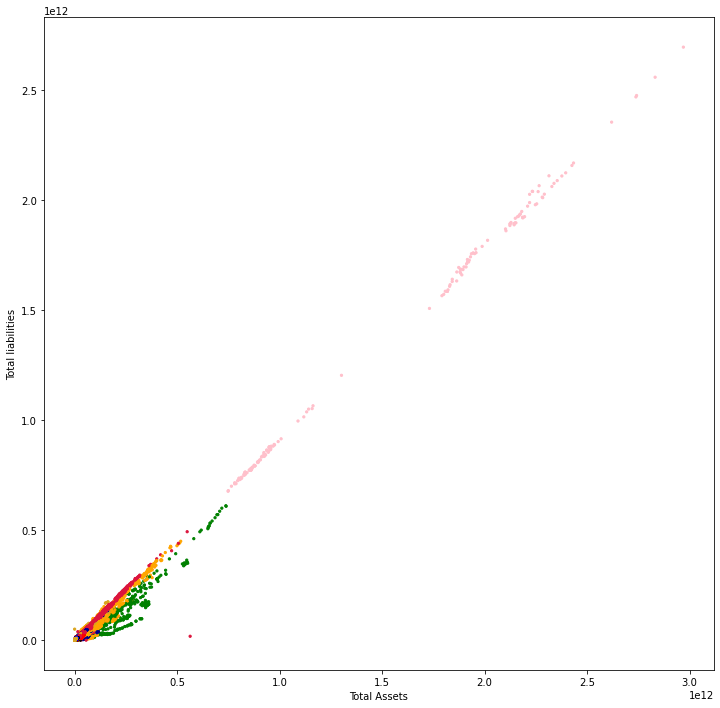

In [22]:
plt.figure(figsize=(10,25));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue",'yellow','orange','gray','pink','black','goldenrod','crimson','darkblue']
X['color'] = X['cluster'].map(lambda p: colors[p])

ax = combo_df.plot(    
    kind="scatter", 
    x="Total Assets", y="Total liabilities",
    figsize=(12,12),
    c = combo_df['color'], s=5
)

#plt.xlim(0,5E11)
#plt.ylim(0,5E11)


# centroids.plot(
#     kind="scatter", 
#     x="Gross Profit", y="Net Income Common", 
#     marker="*", c=["red", "green", "blue",'yellow','orange','black'], s=1000,
#     ax=ax
# )

In [41]:
X['cluster'] == y

Date
2021-03-31    False
2020-12-31    False
2020-09-30    False
2020-06-30    False
2020-03-31    False
              ...  
2012-12-31    False
2012-09-30    False
2012-06-30    False
2012-03-31    False
2011-12-31    False
Length: 104423, dtype: bool

In [44]:
compare_df = X[['cluster']].copy()
compare_df['Sector'] = y
compare_df

,cluster,Sector
Date,,
2021-03-31,10,Information Technology
2020-12-31,10,Information Technology
2020-09-30,10,Information Technology
2020-06-30,10,Information Technology
2020-03-31,10,Information Technology
...,...,...
2012-12-31,2,Health Care
2012-09-30,2,Health Care
2012-06-30,2,Health Care


In [55]:
compare_df['cluster'].value_counts()

4     52003
2     34730
6      6053
3      5850
9      4090
8       777
10      643
5       160
7        39
1        39
0        39
Name: cluster, dtype: int64

In [63]:
compare_df['Sector'].value_counts()

Financials                19571
Industrials               16352
Information Technology    15257
Health Care               14775
Consumer Discretionary    13026
Materials                  4959
Real Estate                4724
Energy                     4671
Communication              4382
Consumer Staples           4196
Utilities                  2510
Name: Sector, dtype: int64

In [62]:
for i in range(11):
    print(compare_df[compare_df['cluster']==i].value_counts())

cluster  Sector     
0        Health Care    39
dtype: int64
cluster  Sector       
1        Communication    39
dtype: int64
cluster  Sector                
2        Financials                13024
         Health Care                8440
         Information Technology     5204
         Industrials                2829
         Consumer Discretionary     1778
         Consumer Staples            739
         Energy                      719
         Real Estate                 700
         Communication               697
         Materials                   441
         Utilities                   159
dtype: int64
cluster  Sector                
3        Financials                1433
         Real Estate               1092
         Consumer Discretionary     595
         Industrials                582
         Information Technology     553
         Materials                  418
         Consumer Staples           397
         Communication              243
         Utilities        